### total 12,447개

미국 - 1042개(뉴스)  
미국 - 1094개(블로그)  

여행 - 991개(뉴스)  
여행 - 1098개(블로그)  

네이버 - 815개(뉴스)  
네이버 - 1944개(블로그)  

네이버블로그 - 453개(뉴스)  
네이버블로그 - 975개(블로그)  

네이버쇼핑 - 300개(뉴스)  
네이버쇼핑 - 1000개(블로그)  

네이버지도 - 508개(뉴스)  
네이버지도 - 924개(블로그)  

네이버클라우드 - 376개(뉴스)  
네이버클라우드 - 927개(블로그)  

***import***

In [1]:
import pandas as pd
import pykospacing
spacer = pykospacing.Spacing()
from konlpy.tag import Okt
okt = Okt()
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

**데이터 불러오기**

In [2]:
USA_news = pd.read_csv('미국(뉴스)-1042row.csv')
USA_blog = pd.read_csv('미국(블로그)-1094row.csv')

In [3]:
USA_news

,title,link,description
0,‘미국 주도·중국 견제’ IPEF 공급망 협정 타결,https://n.news.naver.com/mnews/article/056/001...,\n\n [앵커] 중국을 견제하기 위해 미국 주도로 출범한 다자 경제 협력체 IPE...
1,"""디폴트 없다""... 미국 부채한도 인상안 최종 타결",https://n.news.naver.com/mnews/article/469/000...,"\n\n바이든·매카시 하원의장, 인상안 최종 합의31일 의회 처리, 양당 강경파 설..."
2,중국에 이어 미국까지 한국 반도체 수입 줄였다,https://n.news.naver.com/mnews/article/031/000...,\n\n4월 미국 반도체 수출 전년 比 68.8% 감소중국에 이어 미국까지 우리나라...
3,미국 국가부도 피하나‥백악관-공화당 부채한도 상향 합의,https://n.news.naver.com/mnews/article/214/000...,\n\n[뉴스데스크]◀ 앵커 ▶미국 백악관과 의회가 국가의 부채 한도를 높이는 협상...
4,미국 부채 한도 상향 '잠정 합의'…디폴트 피하나,https://n.news.naver.com/mnews/article/057/000...,\n\n\t\t\t【 앵커멘트 】 바이든 대통령과 케빈 매카시 하원의장이 미국의 ...
...,...,...,...
1037,NaN,https://n.news.naver.com/mnews/article/117/000...,\n \n[마이데일리 = 곽명동 기자]디즈니 픽사 ‘엘리멘탈’의 피터 손 감독이 미...
1038,NaN,https://n.news.naver.com/mnews/article/076/000...,\n \n \n[스포츠조선 이유나 기자] 방송인 김성경이 아들의 뉴욕대 졸업을 축하...
1039,NaN,https://n.news.naver.com/mnews/article/415/000...,\n \n[앳스타일 김예나 기자] 가수 임영웅이 미국 대저택에 입성했다.임영웅은 3...
1040,[경제합시다] 연일 뛰는 삼성전자 주가…미국 ‘이 기업’ 열풍 때문?,https://n.news.naver.com/mnews/article/056/001...,\n\n 꼭 알아야 할 경제 소식만 콕! 짚어 전해 드리는 <경제합시다> 시간입니다...


**본문 합치기**

In [4]:
df_news = USA_news['description'].astype(str).str.cat(sep=' ')

In [5]:
df_blog = USA_blog['description'].astype(str).str.cat(sep=' ')

In [6]:
df_news

'\n\n [앵커] 중국을 견제하기 위해 미국 주도로 출범한 다자 경제 협력체 IPEF가  출범 1년 만에  첫 공급망 협정을 타결했습니다. 중국을 배제한 아시아 태평양 지역의 경제 질서를 세우겠다는 건데, 중국은  자국의 발전을 막기 위한 행위라며 반발했습니다. 정아연 기자가 보도합니다. [리포트]  미국 디트로이트에서 열린 IPEF 회의에서  14개국 통상 장관들이 공급망 협정 타결을 선언했습니다. 공급망과 관련한 미국 주도의  첫 다자 합의입니다. 협정에 따라 한국과 미국, 일본 등 14개 참여국들은  공급망 혼란 시  대응 네트워크를 가동해 대체 공급처와 운송 경로를 찾고 신속한 통관을 진행하는 등 공조하게 됩니다. 중국이 첨단 산업 핵심 소재인 리튬과 희토류 등의 공급망을  장악하는 상황에서  자원 무기화에 대비해 공급망을 다변화한다는 취집니다. [캐서린 타이/미국 무역대표부 대표 : "국제 경제 현실에 적응해야 하는 것은 자명합니다. 그것이야말로 미국이 바이든 대통령의 비전을 실행하기 위해 무역을 활용하려는 이유입니다."] 중국은 즉각 반발했습니다. 이번 협정에 대해 미국이 다른 국가들을 협박해 글로벌 공급망 안정성에  심각한 타격을 입히는 행위라며 단호히 반대한다고 밝혔습니다. [마오 닝/중국 외교부 대변인 : "아시아·태평양 경제의 성공은 개방적이고 상호 이익이 되는 협력 덕분입니다. 지역협력의 틀이 무엇이든 간에 차별적이 아니라 개방적이고 포괄적이어야 합니다."] 지난해 5월 공식 출범한 IPEF는 공급망과 무역 등 4개 분야에서 협상을 해왔으며 이번에 타결을 이룬 공급망 외의 나머지 3개 분야 협상을 계속 이어갑니다. 우리 정부는  이번 협정에 대해  전략 파트너인 인도·태평양 지역 국가와 안정적 공급망을 바탕으로 실질적 경제 협력을 증진해 나가는 초석이 될 것이라고 기대했습니다. KBS 뉴스 정아연입니다. 영상편집:이인영/자료조사:서호정■ 제보하기▷ 전화 : 02-781-1234, 4444▷ 이메일 : kbs1234@kbs.co.kr▷ 카카

### 전처리 함수 
*6주차 01.WordCloud 실습코드 참고*

- <span style = 'font-size:1.1em;line-height:1.5em'>(1) 줄바꿈 문자 제거</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(2) 오탈자 교정 (생략)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(3) 띄어쓰기 교정</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(4) sentence tokenization (너무 오래걸려서 생략)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(5) 특수문자 문자 제거</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(6) word tokenization (형태소 분석 및 stemming)</span>
- <span style = 'font-size:1.1em;line-height:1.5em'>(7) stopword removal</span>

**불용어 목록 생성**

In [7]:
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거

In [8]:
def preprocessing(x):
    p = re.compile('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]')
    results = []
    result = []
    x = x.replace('\n',' ') # (1) 
    df_news = spacer(x) # (3) 
    
    tokens = okt.morphs(x, stem=True) # (6) 
    for token in tokens:
        token = p.sub('', token) # (5) 
        if token not in stopwords:
            result.append(token) # (7) 
    results.extend(result)
    results = ' '.join(results)
    return results

### pos_taging 함수

#(1) 품사 태깅 수행 

#(2) 명사, 형용사, 부사에 해당하는 단어들만 추출하여 저장

#(3) 빈도가 가장 높은 단어는 주로 주제로 검색한 단어이기에 의미있는 결과를 위해 제거

In [ ]:
def pos_taging(x):
    pos_news = okt.pos(x) # (1)
    filtered_result = [word for word, pos in pos_news if pos in ['Noun', 'Adjective', 'Adverb']] # (2)
    nouns_news = [n for n in filtered_result if len(n) > 1] 
    count = Counter(nouns_news) # 각 단어의 출현 빈도를 계산
    tags = count.most_common(100) # 가장 빈도가 높은 단어 100개를 추출
    tags = tags[1:] # (3)
    return tags

**전처리 및 postag 진행**

In [10]:
news = preprocessing(df_news)
news = pos_taging(news)

In [11]:
blog = preprocessing(df_blog)
blog = pos_taging(blog)
blog = [word for word in blog if not word[0].endswith('다')]

## Wordcloud 생성

In [12]:
# wordcloud에서 한글을 사용할 수 있도록 설정하기
font_path = 'C:\\Users\\user\\anaconda3\\envs\\text\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

***news***

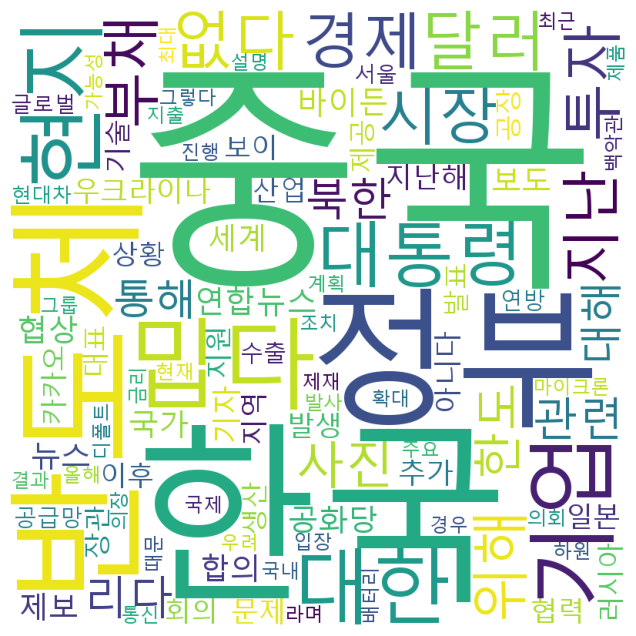

In [20]:
wc = WordCloud(font_path=font_path, 
               background_color='white', 
               width=800, height=800)
cloud = wc.generate_from_frequencies(dict(news))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloud)

***blog***

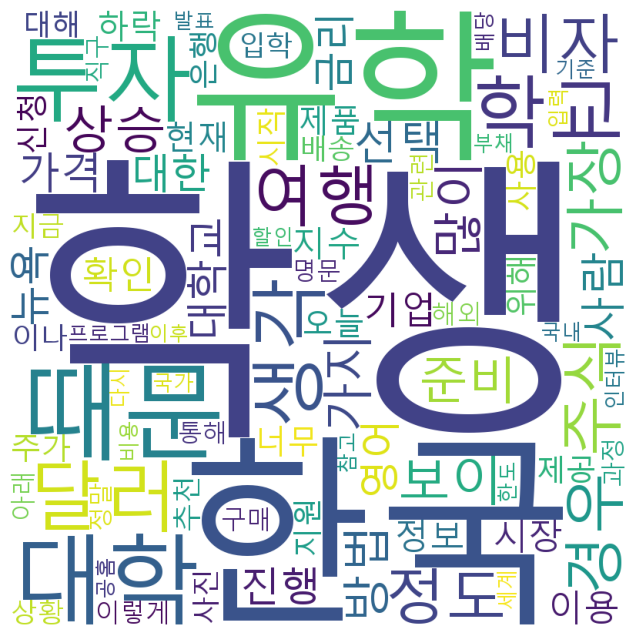

In [21]:
wc = WordCloud(font_path=font_path, 
               background_color='white', 
               width=800, height=800)
cloud = wc.generate_from_frequencies(dict(blog))

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(cloud)